## Inicialización de entorno y definición de matrices de transformación YIQ a RGB


In [29]:
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import figure

In [2]:
# definimos la matriz de transformación de RGB a YIQ 
rgb_to_yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])

# definimos la matriz de transformación de YIQ a RGB
yiq_to_rgb_matrix = np.array([[1, 0.9663, 0.6210], [1, -0.2721, -0.6474], [1, -1.1070, 1.7046]])

### Definición de funciones

In [3]:
# Transforma la imagen de RGB a YIQ
def rgb_to_yiq(imagen):
  if isinstance(imagen, np.ndarray) == False: 
    pixels = asarray(imagen) / 256                                    # tranforma la imagen en un array
  else:
    pixels = imagen
    if isinstance(imagen[0, 0, 0], np.float64) == False: pixels = pixels/256
  yiq_image = pixels                                        # generamos una copia de la imagen para transformarla en YIQ
  num_rows, num_cols = yiq_image.shape[0], yiq_image.shape[1] 
  for row in range(num_rows):                                 # recorremos la imagen y la transofrmamos a YIQ
    for col in range(num_cols):
      yiq_image[row][col] = rgb_to_yiq_matrix.dot(pixels[row][col])
  return yiq_image

In [4]:
# Transforma de YIQ a RGB
def yiq_to_rgb(imagen):
  yiq_image2 = imagen.copy()
  num_rows, num_cols = imagen.shape[0], imagen.shape[1]
  for row in range(num_rows):
    for col in range(num_cols):
      imagen[row][col] = yiq_to_rgb_matrix.dot(yiq_image2[row][col])
      imagen[row][col] = truncate_rgb(imagen[row][col])
  return imagen

In [5]:
# Trunca valore rgb decimales a 0 o a 1 si sobrepasan estos límites
def truncate_rgb(pixel):
  for i in range(3):
    if pixel[i] < 0: pixel[i] = 0
    if pixel[i] > 1: pixel[i] = 1
  return pixel

In [6]:
# Cambia la luminancia y la saturación a valores definidos por el usuario
# Definir ret = True si se desea asignar la nueva imagen a un objeto
def change_lum_sat(image, ret = False):
  alpha = float(input('Ingresar el valor para el coeficiente de luminancia deseado: ', ))
  beta = float(input('Ingresar el valor para el coeficiente de saturación deseado: ', ))
  image = rgb_to_yiq(image)
  yiq_image2 = image
  num_rows, num_cols = image.shape[0], image.shape[1]
  for row in range(num_rows):
      for col in range(num_cols):
        Y = yiq_image2[row][col][0]
        I = yiq_image2[row][col][1]
        Q = yiq_image2[row][col][2]
        Yp = Y * alpha                          # calculamos la nueva luminosidad del pixel
        Ip = I * beta                           # calculamos la nueva cromaticidad del pixel
        Qp = Q * beta
        if Yp > 1 : Yp = 1
        if Yp < 0 : Yp = 0                      # verificamos que la luminosidad no sea mayor a 1, en caso contrario coercionamos a 1
        if Ip > 0.5957 :  Ip = 0.5957           # verificamos que I no sea mayor a 0.5957, en caso contrario coercionamos 
        if Ip < -0.5957 :  Ip -0.5957
        if Qp > 0.5226 : Qp = 0.5226
        if Qp < -0.5226 : Qp = -0.5226
        yiq_image2[row][col][0] = Yp      
        yiq_image2[row][col][1] = Ip
        yiq_image2[row][col][2] = Qp
        image[row][col] = yiq_to_rgb_matrix.dot(yiq_image2[row][col])
        image[row][col] = truncate_rgb(image[row][col])
  if ret == False: 
    #figure(figsize=(20, 10))
    plt.imshow(image)
  else:
    return image

In [7]:
# Retorna 4 parámetros que corresponden al inicio y final de las filas 
# y columnas de la imagen
def get_coords(row, col, image):
  row_init = row - 1
  row_end = row + 2
  col_init = col - 1
  col_end = col + 2
  if row_init < 0: row_init = 0
  if row_end > image.shape[0] - 1: row_end = image.shape[0]
  if col_init < 0: col_init = 0
  if col_end > image.shape[1] - 1: col_end = image.shape[1]
  return row_init, row_end, col_init, col_end

## Ejercicio 1.1

### Carga de imagen

Saving coliseo.jpeg to coliseo (1).jpeg


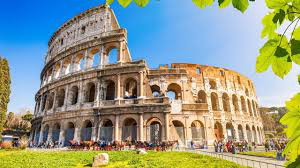

In [43]:
uploaded = files.upload()
im = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im

### Cambio de la luminancia o saturación de la imagen

Ingresar el valor para el coeficiente de luminancia deseado: 0.5
Ingresar el valor para el coeficiente de saturación deseado: 1


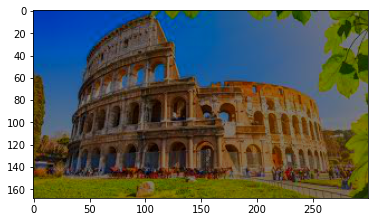

In [33]:
# Sin asignación a objeto
change_lum_sat(im)

Ingresar el valor para el coeficiente de luminancia deseado: 0.3
Ingresar el valor para el coeficiente de saturación deseado: 0.5


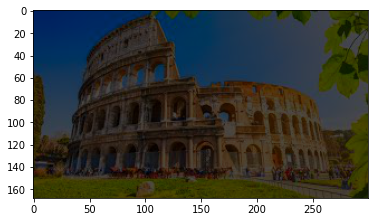

In [36]:
# Con asignación a objeto, por si la imagen se necesita posteriormente
im2 = change_lum_sat(im, ret = True)
plt.imshow(im2)

## Ejercicio 1.2.

### Filtros: raiz, cuadrado y linear a trozos

In [37]:
# Función que permite aplicar un filtro a una imagen
# Definir ret = True si se desea asignar la nueva imagen a un objeto
def filter(image, ret = False):
  image = rgb_to_yiq(image)
  yiq_image2 = image
  num_rows, num_cols = image.shape[0], image.shape[1]
  filter =  input('Seleccione el filtro deseado: \n\nr = Raiz  \nc = cuadrado \nlat = Linear a trozos\n\n', )
  Y_min, Y_max = min(yiq_image2[:, :, 0][0]), max(yiq_image2[:, :, 0][0])
  Y_range = Y_max - Y_min
  slope = 1/Y_range
  for row in range(num_rows):
      for col in range(num_cols):
        Y = yiq_image2[row][col][0]
        if filter   ==  'r': Yp  = Y**(1/2)
        elif filter ==  'c': Yp  = Y**2
        else: 
          if    Y < Y_min: Yp = Y_min
          elif  Y > Y_max: Yp = Y_max
          else: Yp = Y*slope
        yiq_image2[row][col][0] = Yp
        image[row][col] = yiq_to_rgb_matrix.dot(yiq_image2[row][col])
        image[row][col] = truncate_rgb(image[row][col])
  if ret == False: 
    #figure(figsize=(20, 10))
    plt.imshow(image)
  else:
    return image

#### Filtro raíz

Seleccione el filtro deseado: 

r = Raiz  
c = cuadrado 
lat = Linear a trozos

r


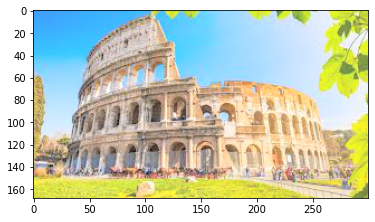

In [38]:
filter(im)

#### Filtro cuadrado

Seleccione el filtro deseado: 

r = Raiz  
c = cuadrado 
lat = Linear a trozos

c


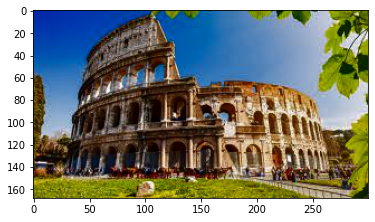

In [44]:
filter(im)

#### Filtro lineal a trozos

Seleccione el filtro deseado: 

r = Raiz  
c = cuadrado 
lat = Linear a trozos

lat


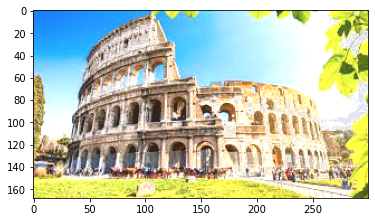

In [45]:
filter(im)

## Ejercicio 1.3 (optativo)

### Definición de la función para la generación de las paletas

In [40]:
def paletas(im, ask=True, transform='grayscale'):
  if ask == True:
    transform = input('Seleccione la paleta deseada: \na = arcoiris \
                     \nr = escala de rojos \nv = escala de verdes \
                     \naz = escala de azules \ncualquier otra letra = escala de grises\n', )
  im_size = im.size
  n_cols, n_rows = im_size
  im = np.asarray(im)
  im2 = np.zeros_like(im)
  for row in range(n_rows):
    for col in range(n_cols):
      R, G, B = abs(im[row][col][0]), abs(im[row][col][1]), abs(im[row][col][2])
      if R < 0.04045: R_linear /= (12.92*256)
      else: R_linear = pow((R+0.055)/(1.055*256), 2.4)
      if G < 0.04045: G_linear /= (12.92*256)
      else: G_linear = pow((G+0.055)/(1.055*256), 2.4)
      if B < 0.04045: B_linear /= (12.92*256)
      else: B_linear = pow((R+0.055)/(1.055*256), 2.4)
      Y_linear = R_linear*0.2126 + G_linear*0.7152 + B_linear*0.0722
      if Y_linear > 0.0031308:
        Y_rgb = abs((pow(Y_linear*1.055, (1/2.4)) - 0.055) * 256)
      else:
        Y_rgb = abs(Y_linear*12.92*256)
      if transform == 'a':
        im2[row][col][0] = 256 - Y_rgb # luminancias bajas generan tonos más rojos (+ casos -> + oscuro)
        if Y_rgb < 129: im2[row][col][1] = 2*Y_rgb
        else: im2[row][col][1] = 256 - 2*Y_rgb # luminancias bajas generan tonos más azules (- casos -> + claro)
        im2[row][col][2] = Y_rgb 
        if Y_rgb > 200: # luminancias muy altas corresponden al fondo, por lo que las forzamos a que sean negras
          im2[row][col][0] = im2[row][col][1] = im2[row][col][2] = 0 
      elif transform == 'r':
        im2[row][col][0] = 256 - Y_rgb
        im2[row][col][1] = 0
        im2[row][col][2] = 0
      elif transform == 'v':
        im2[row][col][0] = 0
        im2[row][col][1] = 256 - Y_rgb
        im2[row][col][2] = 0
      elif transform == 'az':
        im2[row][col][0] = 0
        im2[row][col][1] = 0
        im2[row][col][2] = 256 - Y_rgb
      else: 
        im2[row][col] = 256 - Y_rgb
  return Image.fromarray(im2)

### Carga de imagen (dengue en el mundo)

Saving dengue.png to dengue (1).png


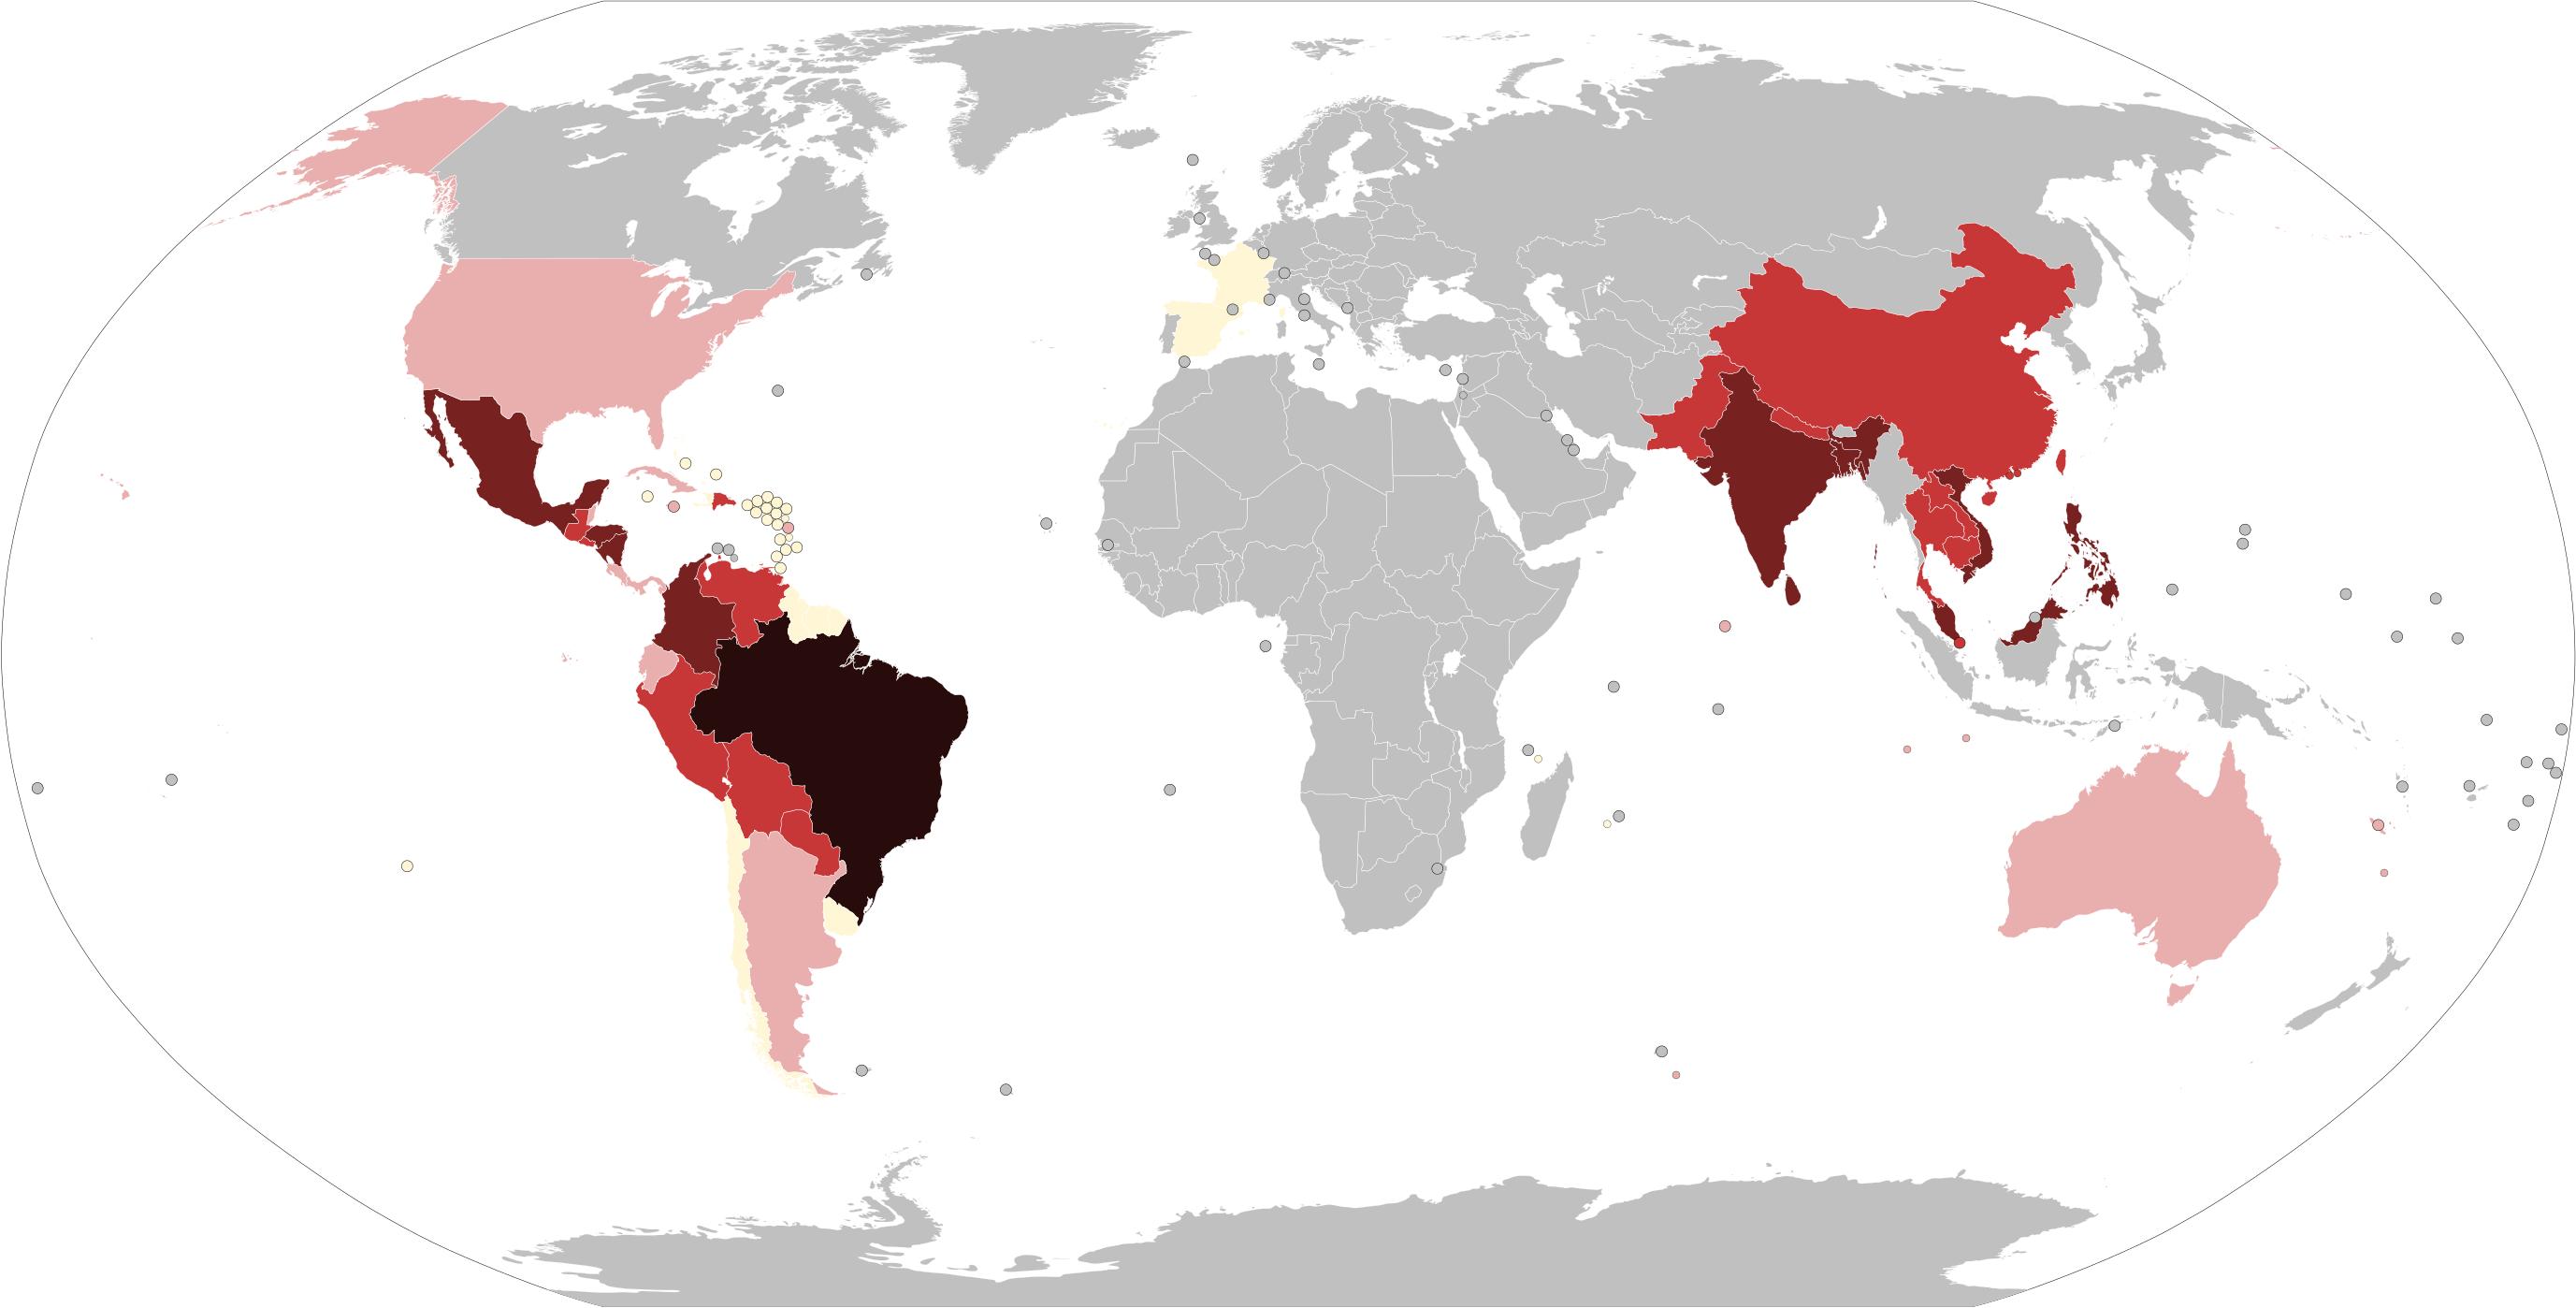

In [46]:
uploaded = files.upload()
im = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im

### Escala de grises

Seleccione la paleta deseada: 
a = arcoiris                      
r = escala de rojos 
v = escala de verdes                      
az = escala de azules 
cualquier otra letra = escala de grises
hf


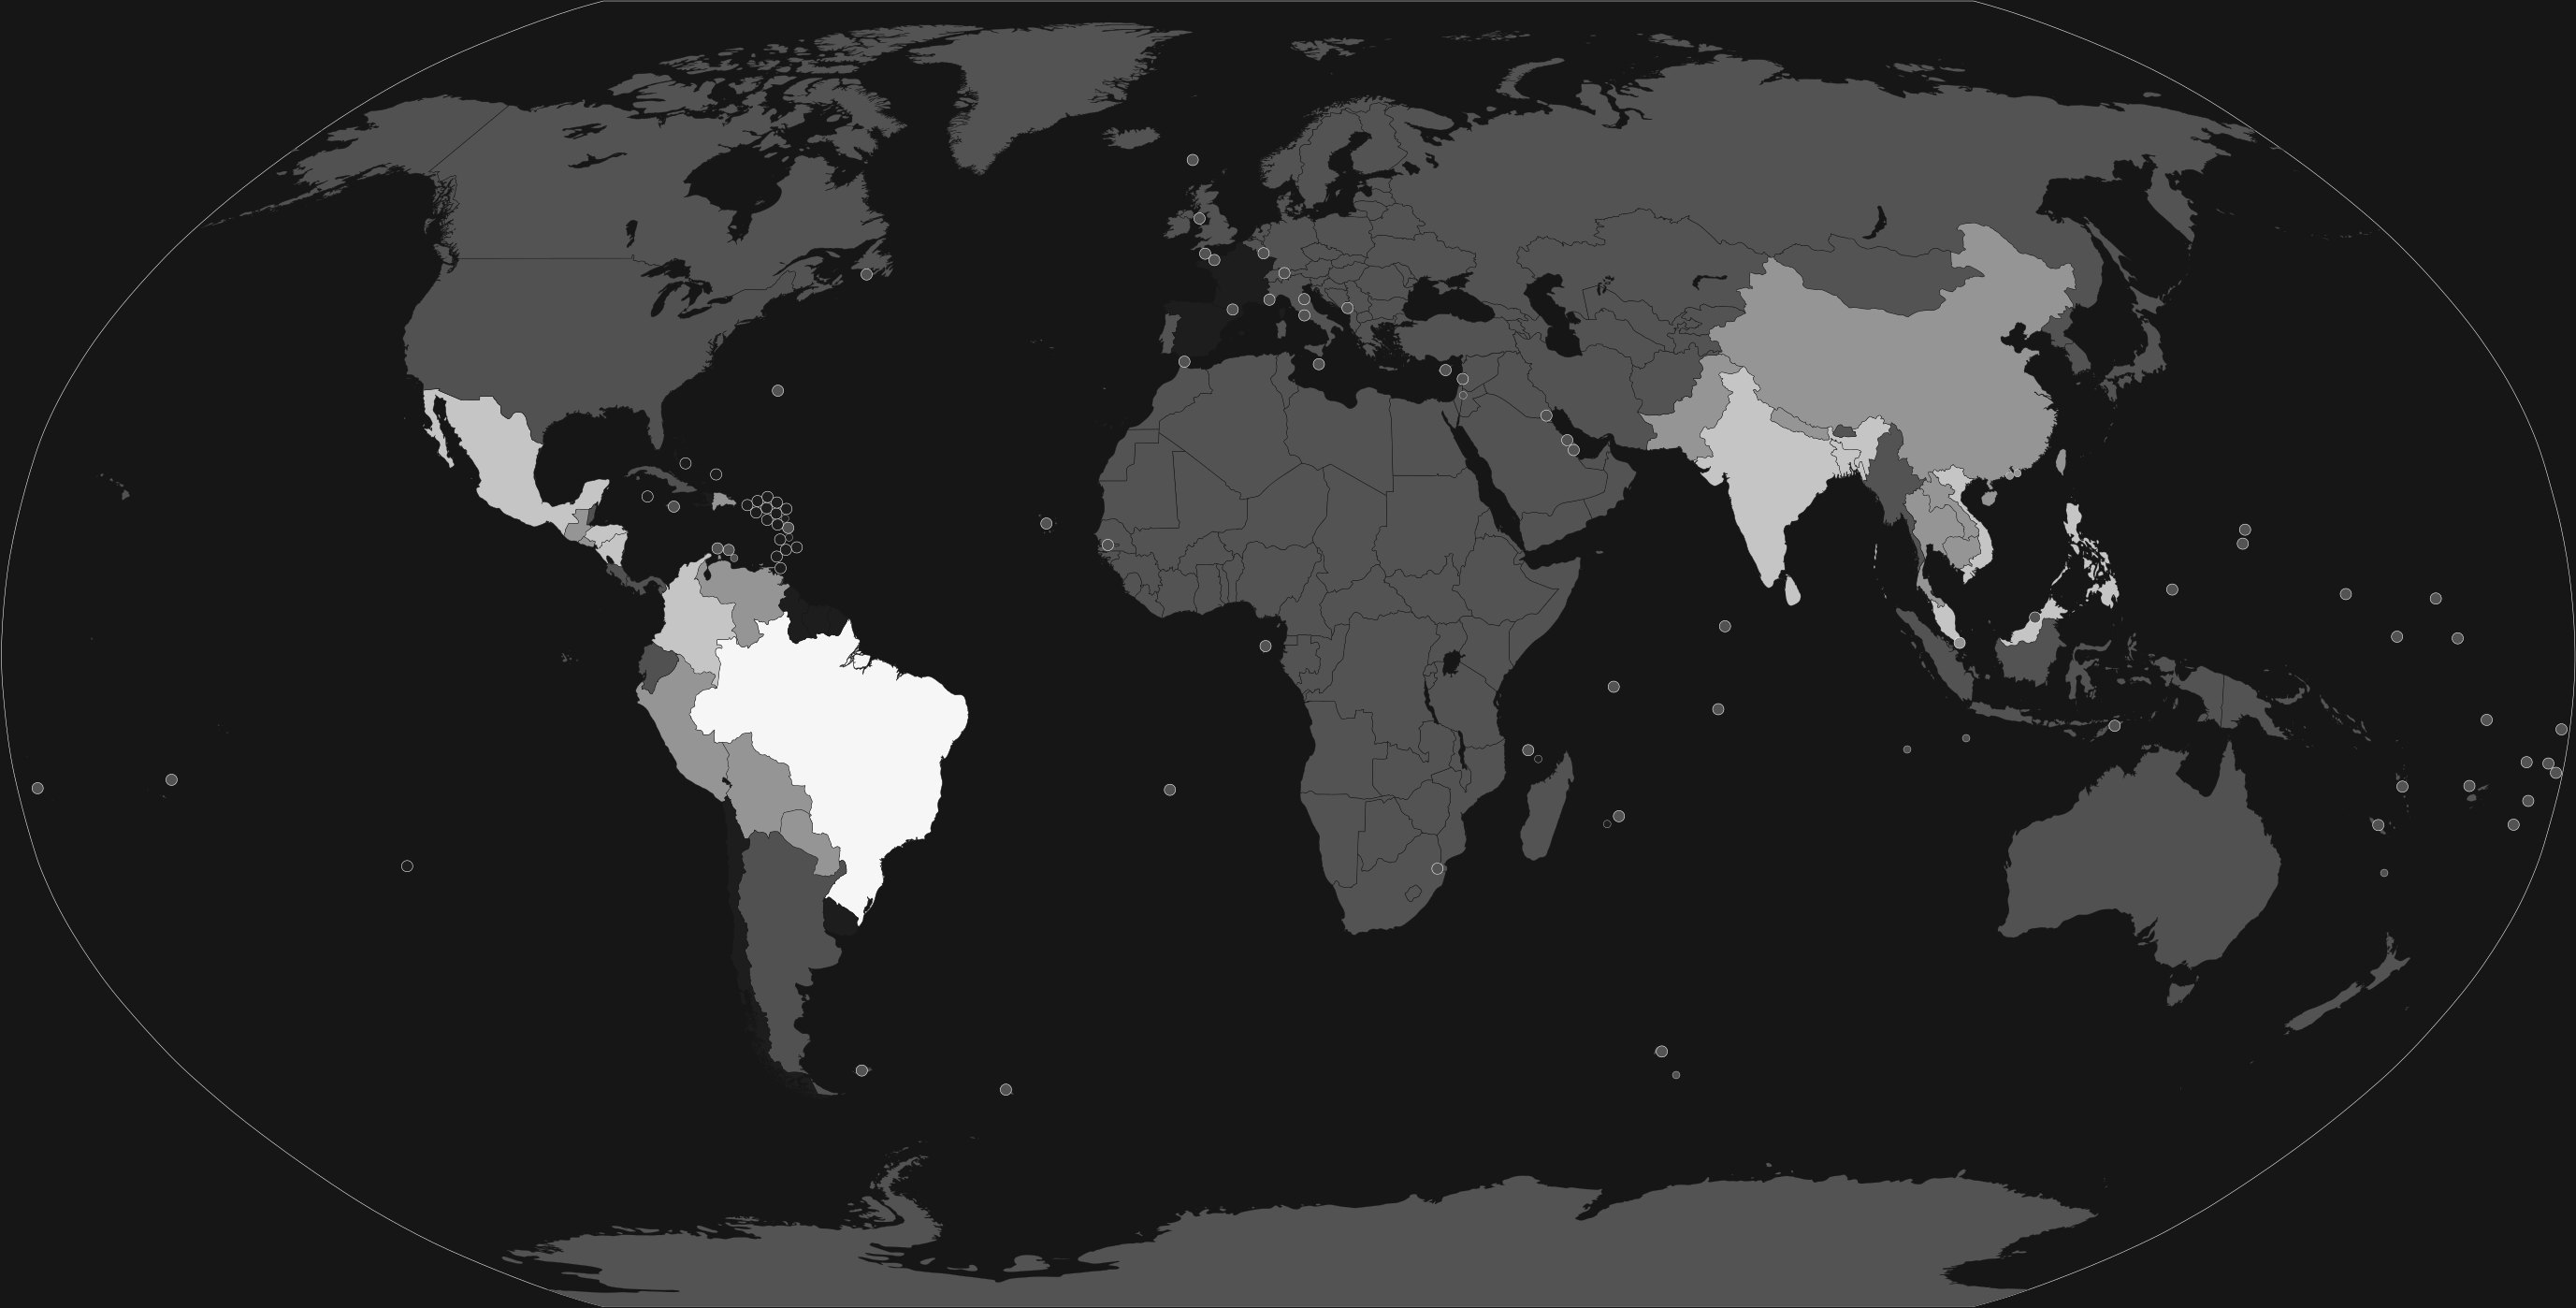

In [47]:
paletas(im)

### Paleta arcoiris

Seleccione la paleta deseada: 
a = arcoiris                      
r = escala de rojos 
v = escala de verdes                      
az = escala de azules 
cualquier otra letra = escala de grises
a


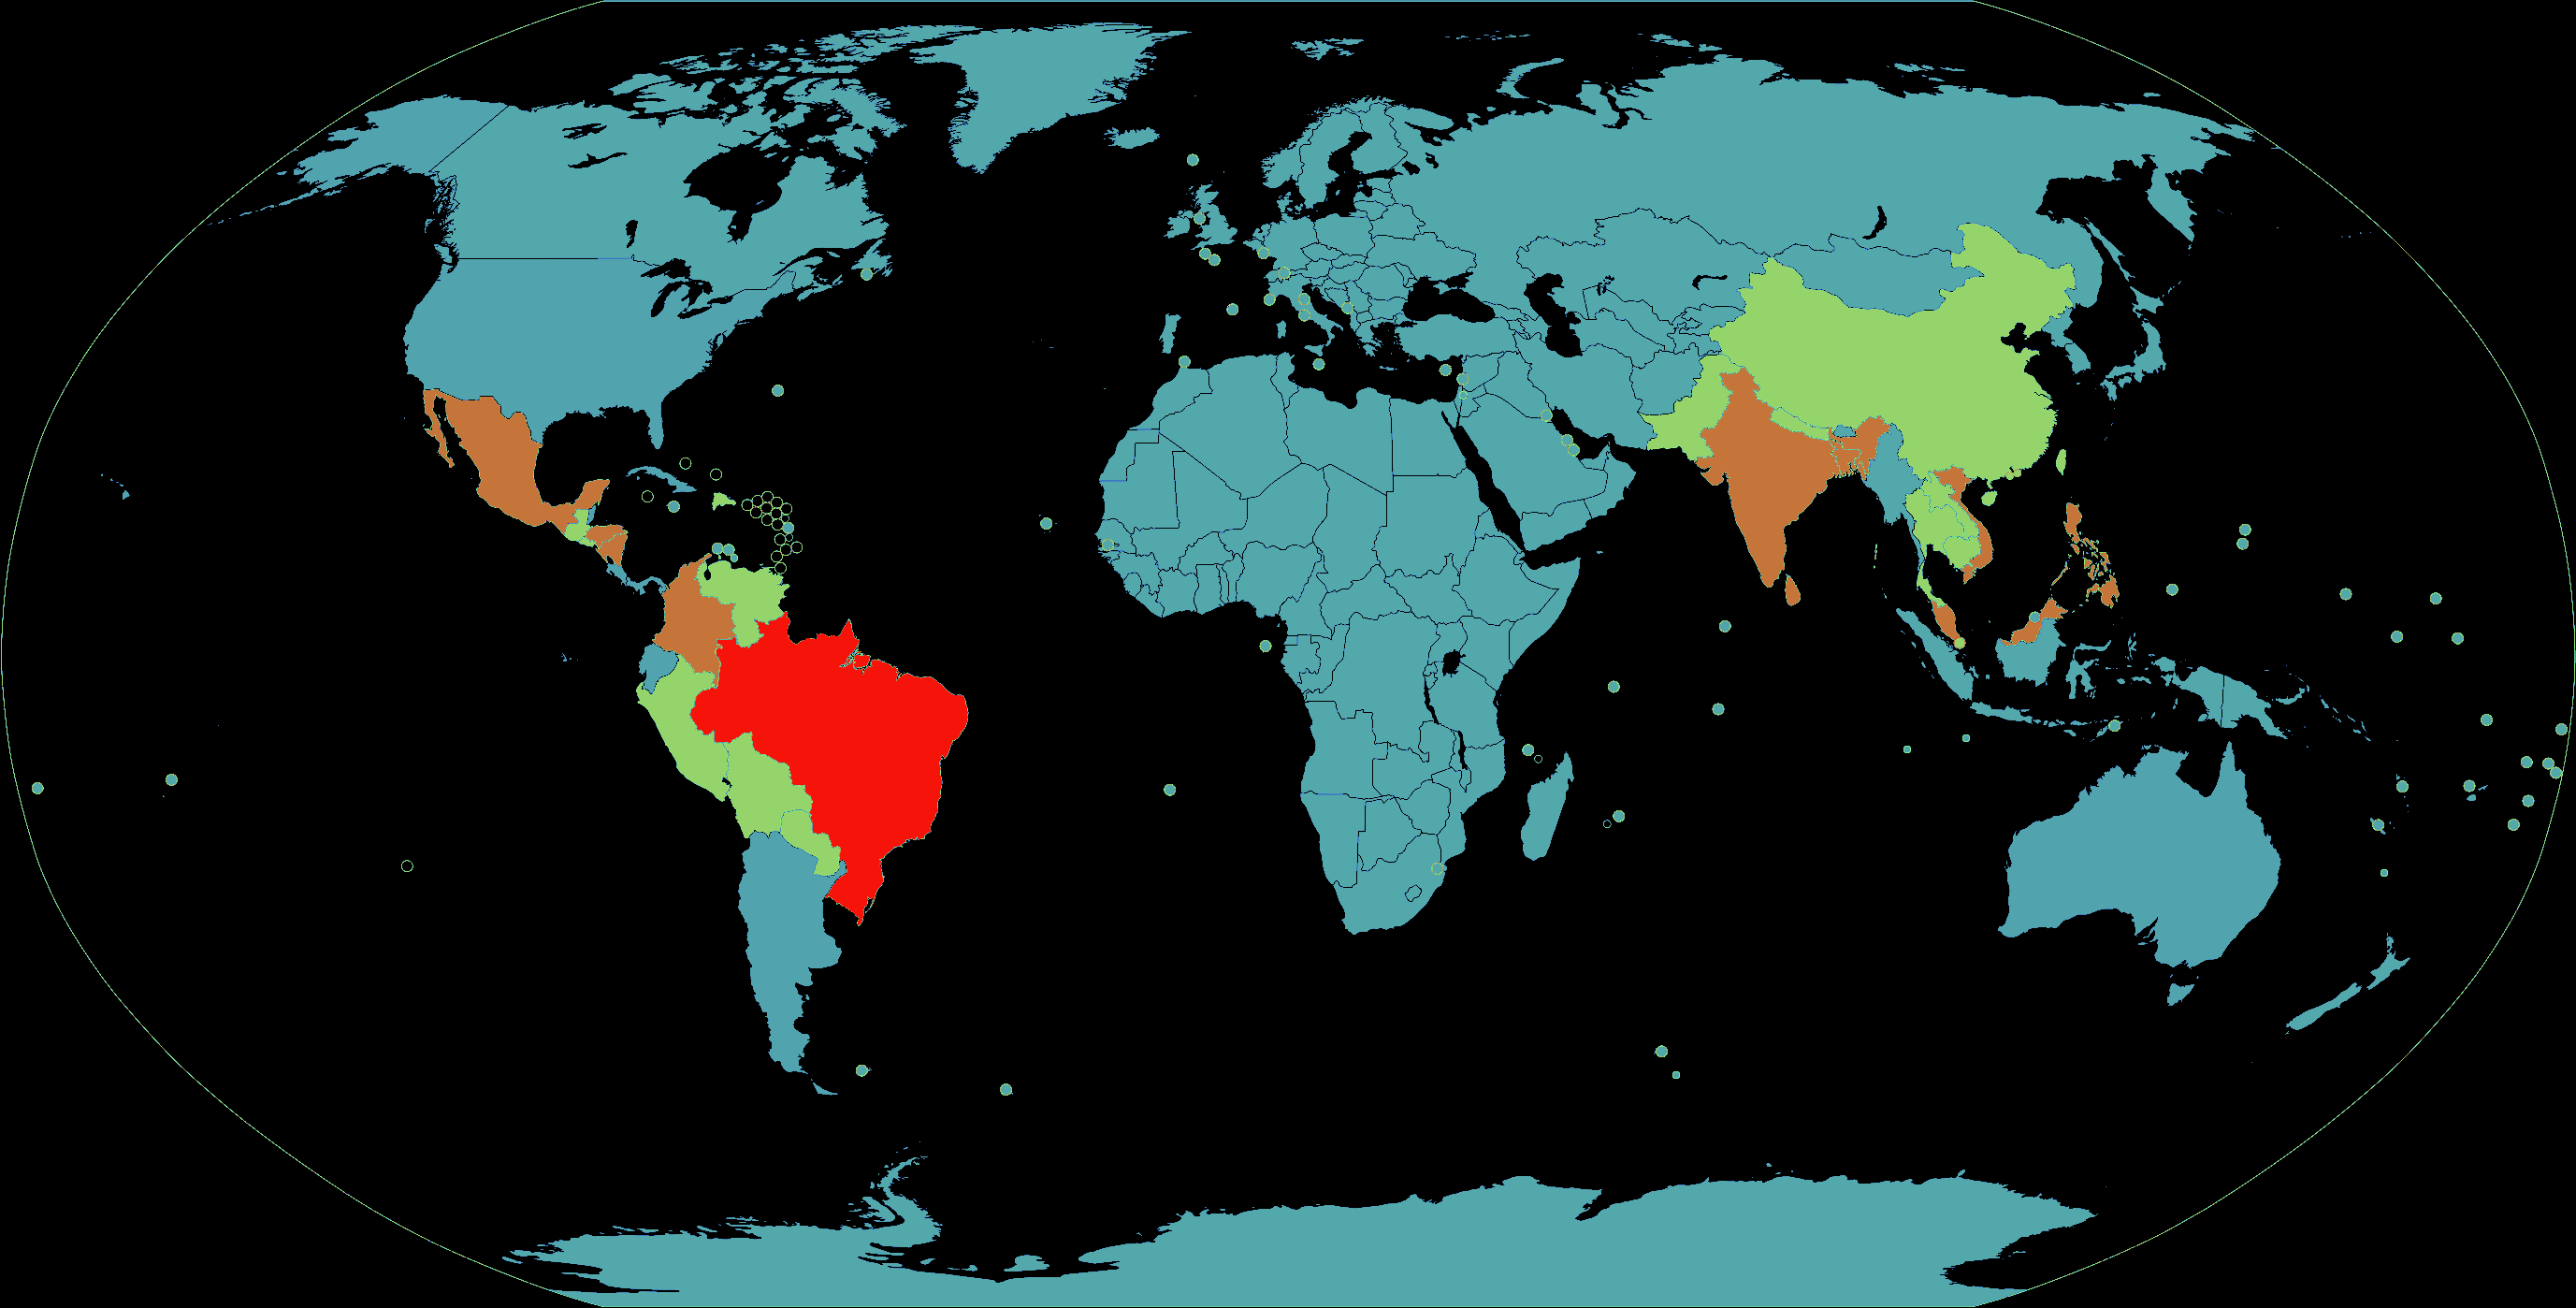

In [48]:
paletas(im)

### Paleta roja

Seleccione la paleta deseada: 
a = arcoiris                      
r = escala de rojos 
v = escala de verdes                      
a = escala de azules 
cualquier otra letra = escala de grises
r


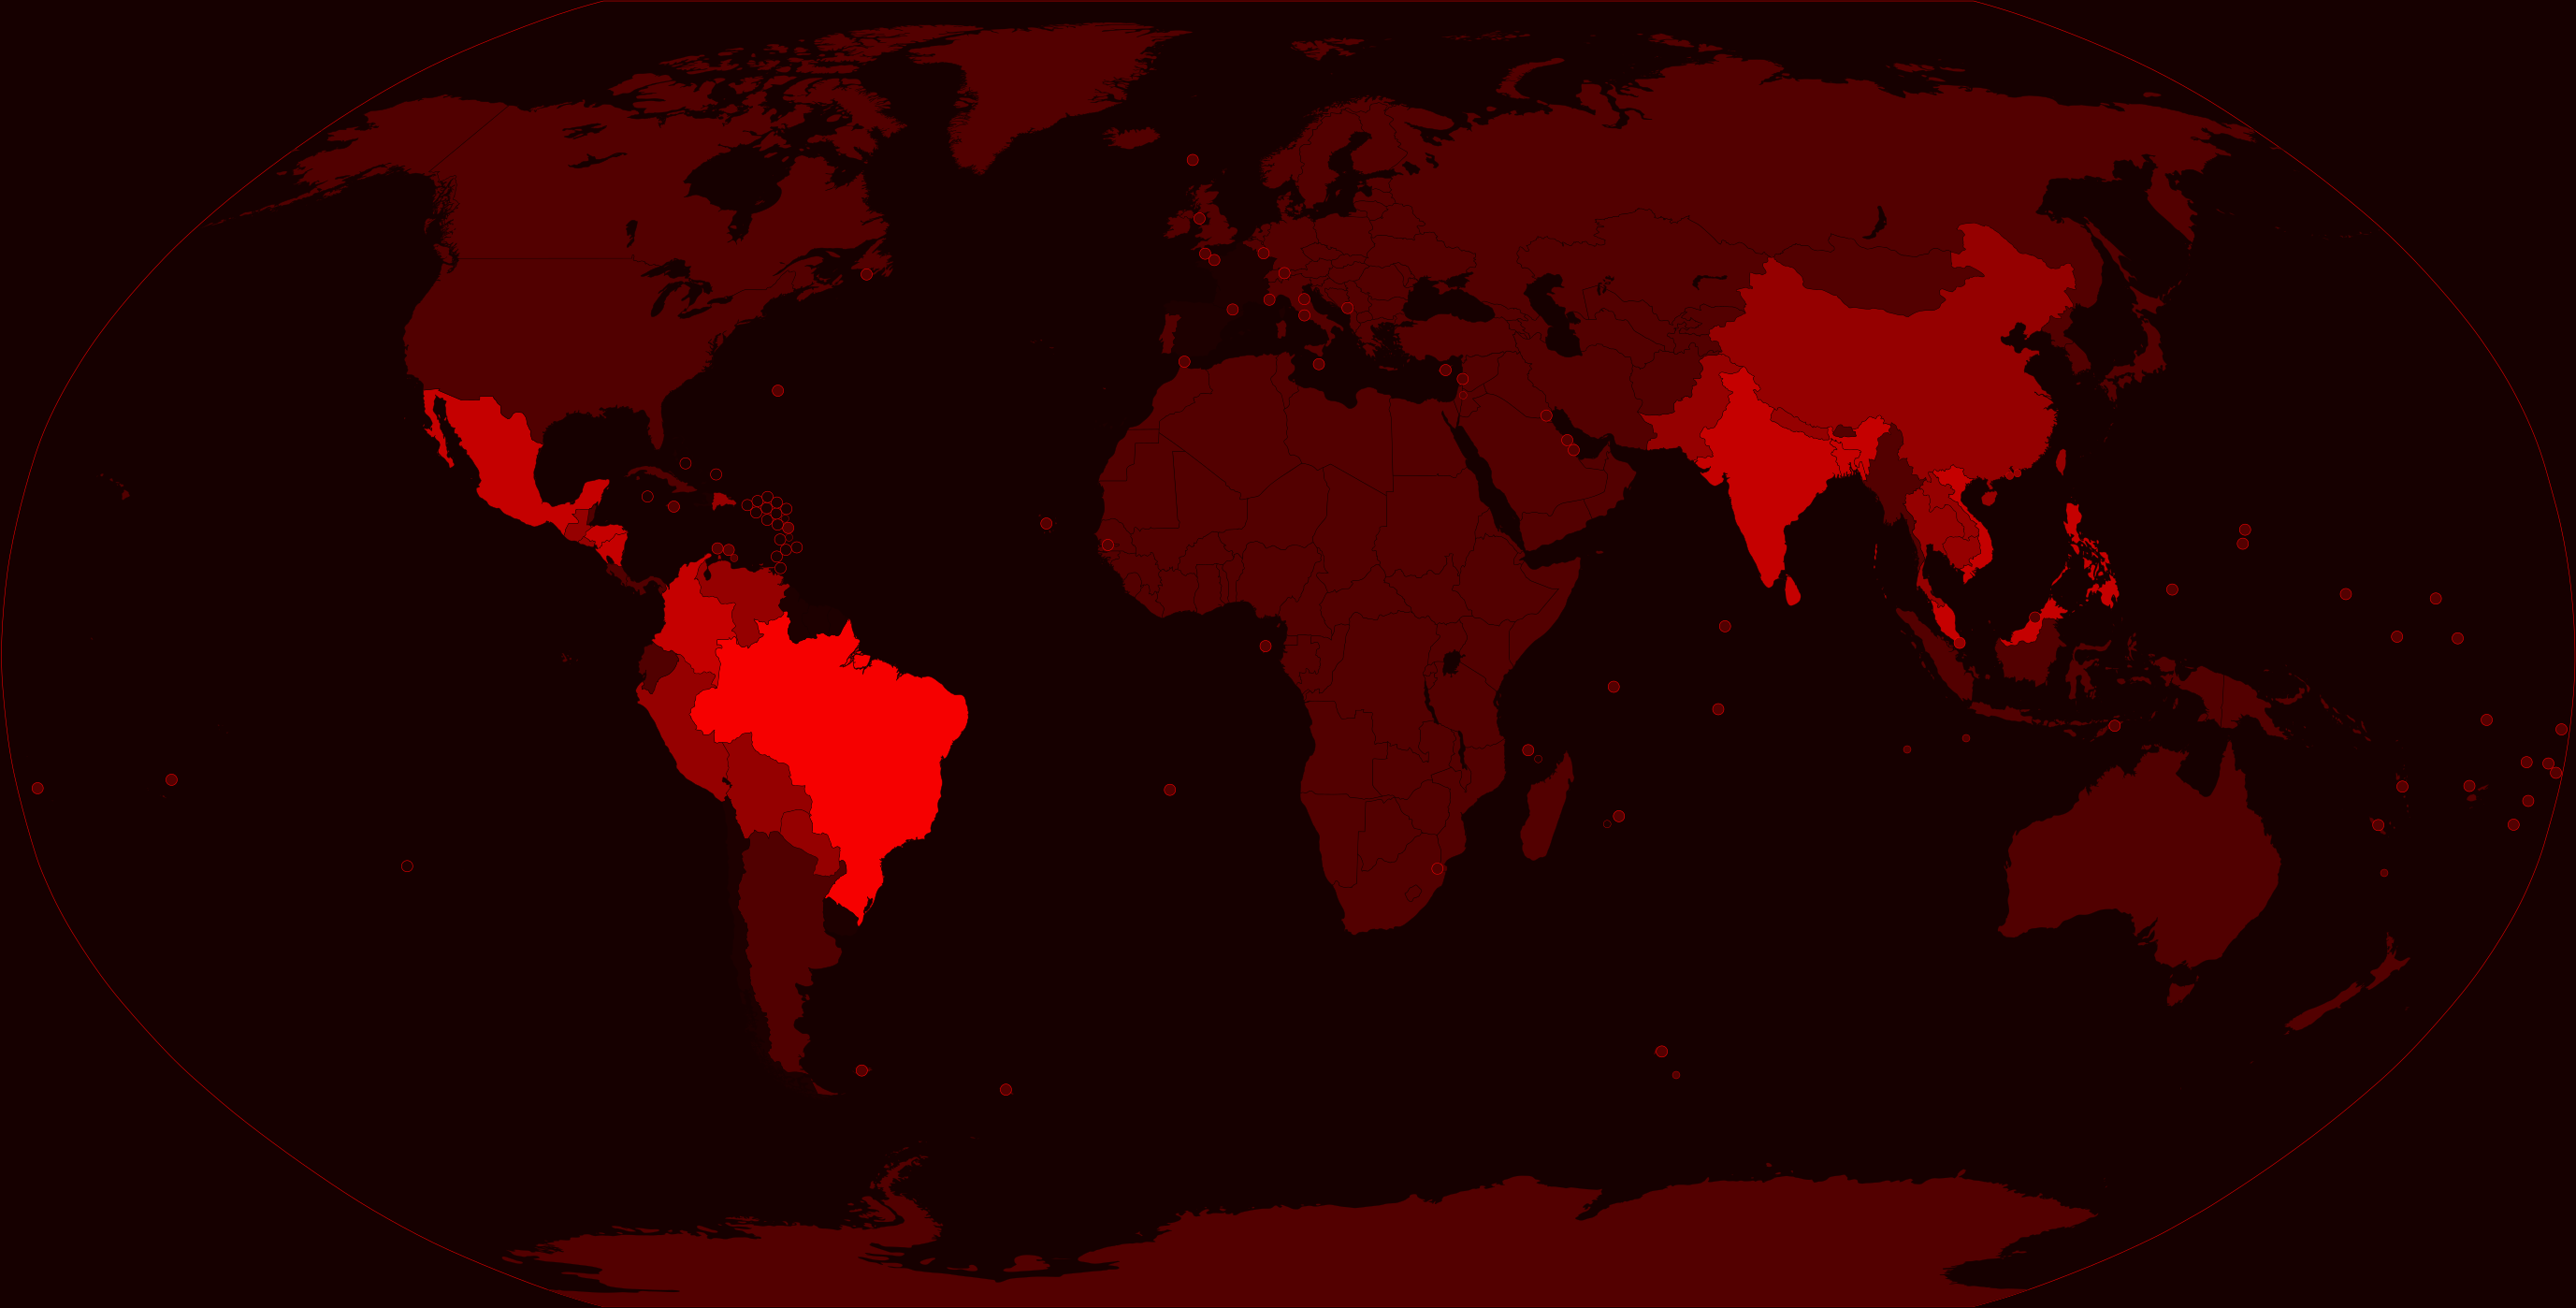

In [ ]:
paletas(im)

### Paleta verde

Seleccione la paleta deseada: 
a = arcoiris                      
r = escala de rojos 
v = escala de verdes                      
az = escala de azules 
cualquier otra letra = escala de grises
v


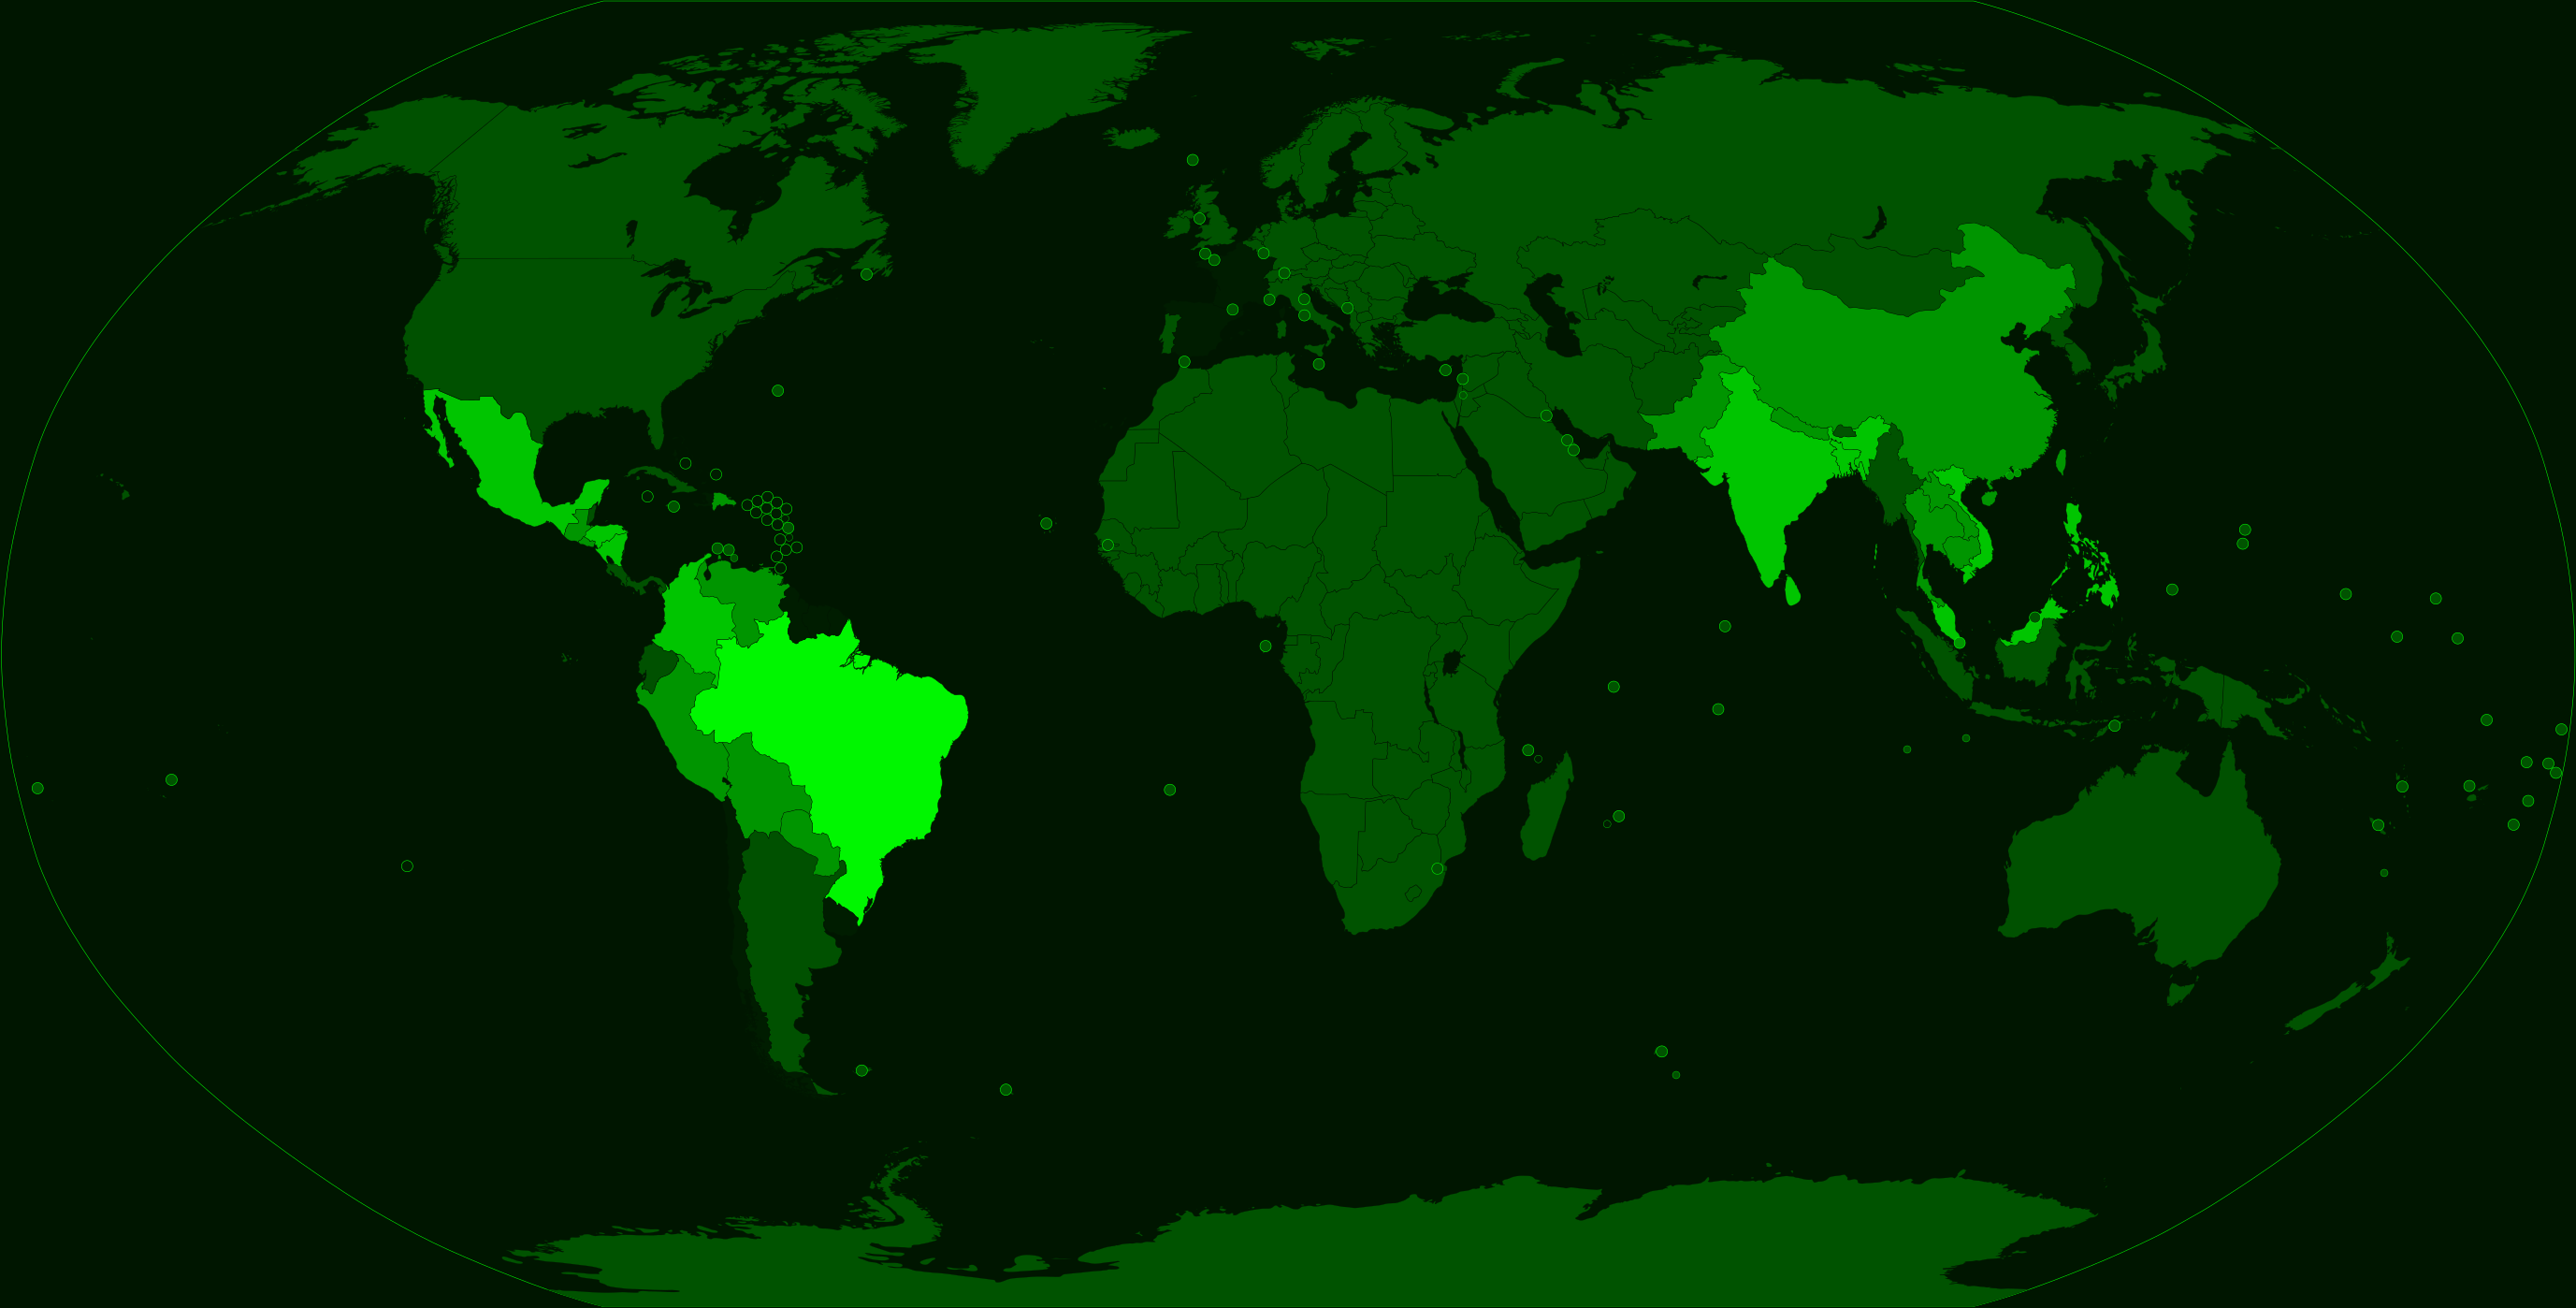

In [ ]:
paletas(im)

### Paleta azul

Seleccione la paleta deseada: 
a = arcoiris                      
r = escala de rojos 
v = escala de verdes                      
a = escala de azules 
cualquier otra letra = escala de grises
a


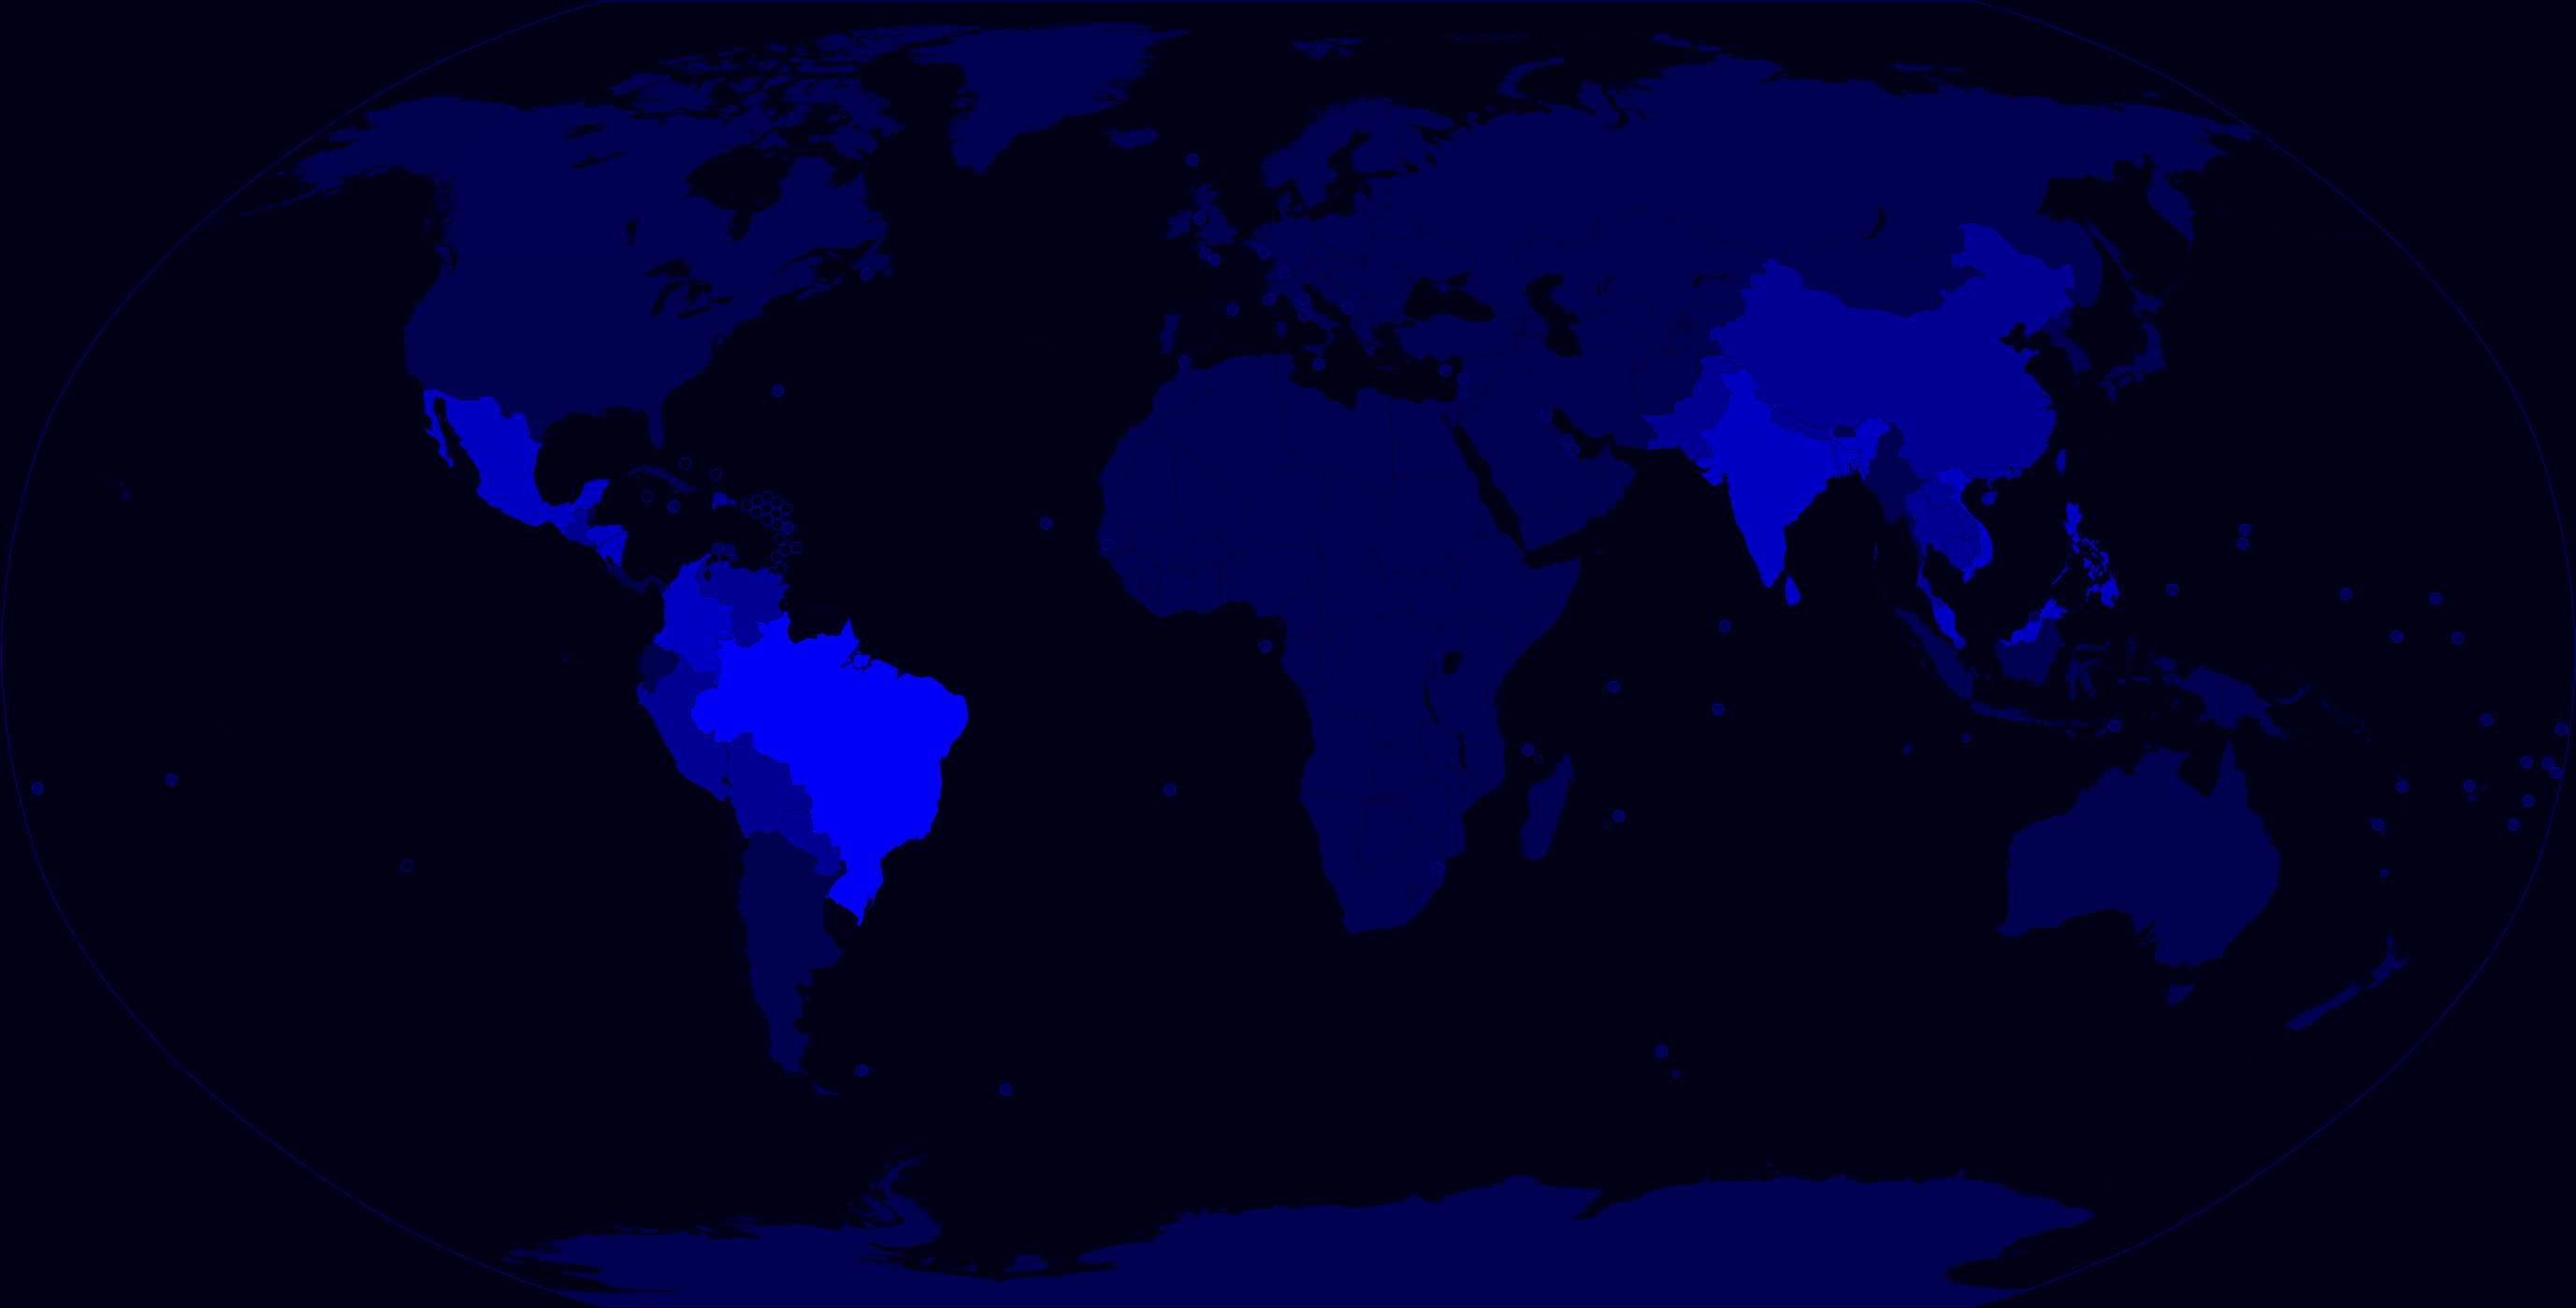

In [ ]:
paletas(im)

## Ejercicio 1.4 (optativo)

#### Carga de imágenes

Saving m2.jpeg to m2 (1).jpeg


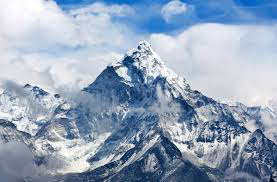

In [ ]:
uploaded = files.upload()
im1 = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im1

Saving m3.jpeg to m3.jpeg


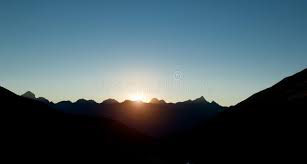

In [ ]:
uploaded = files.upload()
im2 = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im2

#### Cuasi suma

In [ ]:
def cuasi_suma(im1, im2, ask=True, ret=False, suma='clamp'):
  if ask == True:
    suma = input('Seleccione la suma deseada: \n\nc = clampeada \np = promediada \
                     \ncualquier otra letra = if-lighter\n', )
  im_size_min = min(im1.size, im2.size)
  im1 = im1.resize(im_size_min, resample=0)
  im2 = im2.resize(im_size_min, resample=0)
  im1_yiq   = rgb_to_yiq(im1)
  im2_yiq   = rgb_to_yiq(im2)
  im_sum_yiq = im1_yiq.copy()
  num_cols, num_rows = im_size_min
  for row in range(num_rows):
    for col in range(num_cols):
      coords = get_coords(row, col, np.asarray(im_sum_yiq))
      pix = im_sum_yiq[coords[0]:coords[1], coords[2]:coords[3], 0]
      Ya, Ia, Qa = im1_yiq[row][col][0], im1_yiq[row][col][1], im1_yiq[row][col][2] 
      Yb, Ib, Qb = im2_yiq[row][col][0], im2_yiq[row][col][1], im2_yiq[row][col][2]
      Yc = Ya + Yb
      if suma == 'clamp':
        if Yc > 1: Yc = 1
      elif suma == 'prom': Yc = Yc/2   
      else:
        if Ya > Yb: Yc = Ya
        else: Yc = Yb   
      Ic = (Ya*Ia + Yb*Ib)/(Ya+Yb)
      if suma == 'clamp':
        if Ic > 0.5957: Ic = 0.5957
      elif suma == 'prom': Ic = Ic/2
      else:
        if Ya > Yb: Ic = Ia
        else: Ic = Ib  
      Qc = (Ya*Qa + Yb*Qb)/(Ya+Yb)
      if suma == 'clamp':
        if Qc > 0.5226: Qc = 0.5226
      elif suma == 'prom': Qc = Qc/2
      else:
        if Ya > Yb: Qc = Qa 
        else: Qc = Qb         
      im_sum_yiq[row][col][0] = Ya
      im_sum_yiq[row][col][1] = Ic
      im_sum_yiq[row][col][2] = Qc 
  im_sum_rgb = yiq_to_rgb(im_sum_yiq)
  if ret == False: 
    plt.imshow(im_sum_rgb)
  else:
    return im_sum_rgb  

Seleccione la suma deseada: 

c = clampeada 
p = promediada                      
i = if-lighter
t


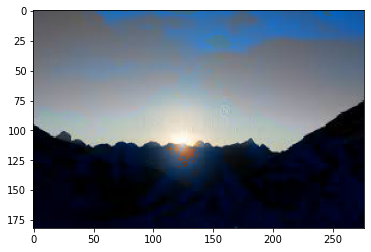

In [ ]:
cuasi_suma(im1, im2, suma='if_lighter')

### Cuasi resta

In [ ]:
def cuasi_resta(im1, im2, ask=True, ret=False, resta='clamp'):
  if ask == True:
    resta = input('Seleccione la resta deseada: \n\nc = clampeada \np = promediada \
                     \ncualquier otra letra = if-darker\n', )
  im_size_min = min(im1.size, im2.size)
  im1 = im1.resize(im_size_min, resample=0)
  im2 = im2.resize(im_size_min, resample=0)
  im1_yiq   = rgb_to_yiq(im1)
  im2_yiq   = rgb_to_yiq(im2)
  im_sum_yiq = im1_yiq.copy()
  num_cols, num_rows = im_size_min
  for row in range(num_rows):
    for col in range(num_cols):
      coords = get_coords(row, col, np.asarray(im_sum_yiq))
      pix = im_sum_yiq[coords[0]:coords[1], coords[2]:coords[3], 0]
      Ya, Ia, Qa = im1_yiq[row][col][0], im1_yiq[row][col][1], im1_yiq[row][col][2] 
      Yb, Ib, Qb = im2_yiq[row][col][0], im2_yiq[row][col][1], im2_yiq[row][col][2]
      Yc = Ya + Yb
      if resta == 'clamp':
        if Yc < 0: Yc = 0
      elif resta == 'prom': Yc = Yc/2   
      else:
        if Ya < Yb: Yc = Ya
        else: Yc = Yb   
      Ic = (Ya*Ia + Yb*Ib)/(Ya+Yb)
      if resta == 'clamp':
        if Ic < -0.5957: Ic = -0.5957
      elif resta == 'prom': Ic = Ic/2
      else:
        if Ya < Yb: Ic = Ia
        else: Ic = Ib  
      Qc = (Ya*Qa + Yb*Qb)/(Ya+Yb)
      if resta == 'clamp':
        if Qc < -0.5226: Qc = -0.5226
      elif resta == 'prom': Qc = Qc/2
      else:
        if Ya < Yb: Qc = Qa 
        else: Qc = Qb         
      im_sum_yiq[row][col][0] = Ya
      im_sum_yiq[row][col][1] = Ic
      im_sum_yiq[row][col][2] = Qc 
  im_sum_rgb = yiq_to_rgb(im_sum_yiq)
  if ret == False: 
    plt.imshow(im_sum_rgb)
  else:
    return im_sum_rgb  

Seleccione la resta deseada: 

c = clampeada 
p = promediada                      
cualquier otra letra = if-darker
dgf


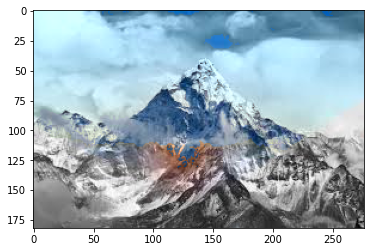

In [ ]:
cuasi_resta(im1, im2)

## Ejercicio 2.1


### Pasabajos

In [ ]:
def size_transform3x3(image):
  im_out = np.empty(shape = (image.shape[0]+2, image.shape[1]+2, 3))
  # Repito fila 0
  im_out[0, 1:(im_out.shape[1]-1), :] = image[0, :, :]
  # Repito última fila
  im_out[im_out.shape[0] - 1, 1:(im_out.shape[1]-1), :] = image[image.shape[0] - 1, :, :]
  # Repito columna 0
  im_out[1:(im_out.shape[0]-1), 0, :] = image[0:(image.shape[0]), 0, :]
  # Repito última columna
  im_out[1:(im_out.shape[0]-1), im_out.shape[1]-1, :] = image[0:(image.shape[0]), image.shape[1]-1, :]
  # Relleno esquinas con el valor de la esquina de la imagen original
  # esquina superior izquierda
  im_out[0, 0, :] = image[0, 0, :]
  # esquina superior derecha
  im_out[0, im_out.shape[1]-1, :] = image[0, image.shape[1]-1, :]
  # esquina inferior izquierda
  im_out[im_out.shape[0]-1, 0, :] = image[image.shape[0]-1, 0, :]
  # esquina inferior derecha
  im_out[im_out.shape[0]-1, im_out.shape[1]-1, :] = image[image.shape[0]-1, image.shape[1]-1, :]
  # Relleno toda la imagen interior
  im_out[1:im_out.shape[0]-1, 1:im_out.shape[1]-1, :] = image
  return im_out

In [ ]:
def size_transform5x5(image):
  im_out = np.empty(shape = (image.shape[0]+4, image.shape[1]+4, 3))
  # Repito fila 0, 2 veces
  im_out[0, 2:(im_out.shape[1]-2), :] = image[0, :, :]
  im_out[1, 2:(im_out.shape[1]-2), :] = image[0, :, :]
  # Repito última fila, 2 veces
  im_out[im_out.shape[0] - 2, 2:(im_out.shape[1]-2), :] = image[image.shape[0] - 1, :, :]
  im_out[im_out.shape[0] - 1, 2:(im_out.shape[1]-2), :] = image[image.shape[0] - 1, :, :]
  # Repito columna 0, 2 veces
  im_out[2:(im_out.shape[0]-2), 0, :] = image[0:(image.shape[0]), 0, :]
  im_out[2:(im_out.shape[0]-2), 1, :] = image[0:(image.shape[0]), 0, :]
  # Repito última columna, 2 veces
  im_out[2:(im_out.shape[0]-2), im_out.shape[1]-2, :] = image[0:(image.shape[0]), image.shape[1]-1, :]
  im_out[2:(im_out.shape[0]-2), im_out.shape[1]-1, :] = image[0:(image.shape[0]), image.shape[1]-1, :]
  # Relleno esquinas con el valor de la esquina de la imagen original
  # esquina superior izquierda (4 valores)
  im_out[0, 0, :] = im_out[0, 1, :] = im_out[1, 0, :] = im_out[1, 1, :] = image[0, 0, :]
  # esquina superior derecha (4 valores)
  im_out[0, im_out.shape[1]-1, :] = im_out[0, im_out.shape[1]-2, :] = im_out[1, im_out.shape[1]-1, :] = \
    im_out[1, im_out.shape[1]-2, :] = image[0, image.shape[1]-1, :]
  # esquina inferior izquierda (4 valores)
  im_out[im_out.shape[0]-1, 0, :] = im_out[im_out.shape[0]-1, 1, :] = im_out[im_out.shape[0]-2, 0, :] = \
    im_out[im_out.shape[0]-2, 1, :] = image[image.shape[0]-1, 0, :]
  # esquina inferior derecha
  im_out[im_out.shape[0]-1, im_out.shape[1]-1, :] = im_out[im_out.shape[0]-1, im_out.shape[1]-2, :] = \
    im_out[im_out.shape[0]-2, im_out.shape[1]-2, :] = im_out[im_out.shape[0]-2, im_out.shape[1]-1, :] = \
    image[image.shape[0]-1, image.shape[1]-1, :]
  # Relleno toda la imagen interior
  im_out[2:im_out.shape[0]-2, 2:im_out.shape[1]-2, :] = image
  return im_out

In [ ]:
def filter_conv(image, ret = False):
  pasabajos_plano = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9
  bartlett3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
  gauss5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256
  image = rgb_to_yiq(image)
  yiq_image2 = image
  filter =  input('Seleccione el filtro deseado: \n\n0 = Pasabajos plano  \n1 = Bartlett 3x3 \n2 = Gaussiano 5x5\n\n', )
  num_rows, num_cols = image.shape[0], image.shape[1]
  if filter == "0": 
    filtro = pasabajos_plano
    image_resized = size_transform3x3(image)
  elif filter == "1": 
    filtro = bartlett3x3
    image_resized = size_transform3x3(image)
  elif filter == "2": 
    filtro = gauss5x5
    image_resized = size_transform5x5(image)
  else: print("Seleccione alguno de los filtros permitidos"); return
  for row in range(num_rows):
      for col in range(num_cols):
        if ((filter == "0") | (filter == "1")):
          pix = image_resized[row:(row+3), col:(col+3), 0]
        else:
          pix = image_resized[row:(row+5), col:(col+5), 0]
        Yp = np.sum(np.multiply(pix, filtro))                         
        yiq_image2[row][col][0] = Yp      
        yiq_image2[row][col][1] = 0
        yiq_image2[row][col][2] = 0
  im_out = yiq_to_rgb(yiq_image2)
  if ret == False: 
    figure(figsize=(10, 10))
    plt.imshow(im_out)
  else:
    return im_out

Seleccione el filtro deseado: 

0 = Pasabajos plano  
1 = Bartlett 3x3 
2 = Gaussiano 5x5

0


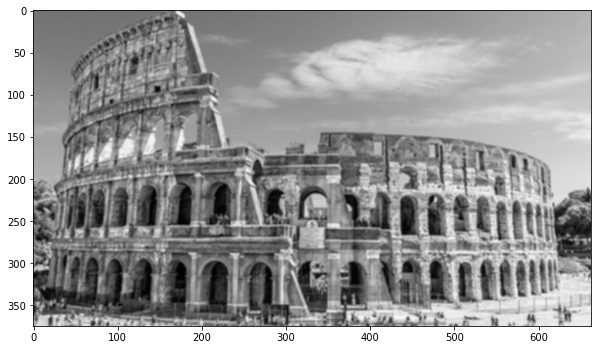

In [ ]:
# pasabajos plano
filter_conv(im)

Seleccione el filtro deseado: 

0 = Pasabajos plano  
1 = Bartlett 3x3 
2 = Gaussiano 5x5

1


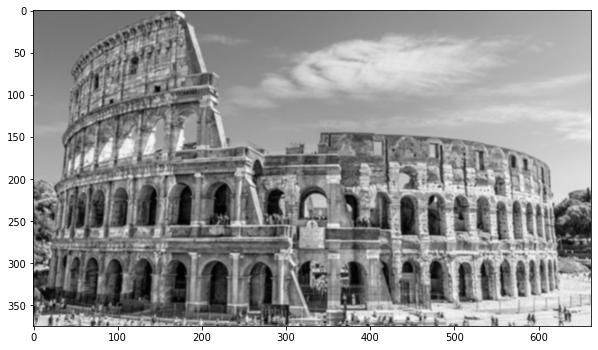

In [ ]:
# pasabajos bartlett 3x3
filter_conv(im)

Seleccione el filtro deseado: 

0 = Pasabajos plano  
1 = Bartlett 3x3 
2 = Gaussiano 5x5

2


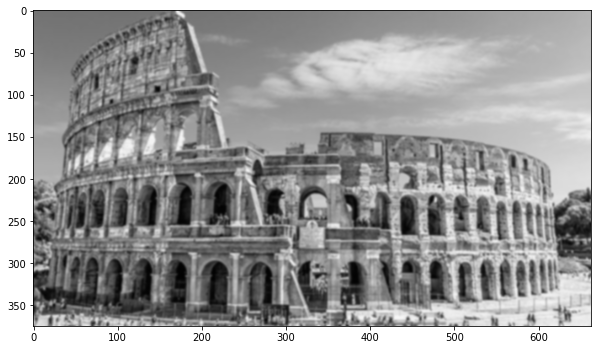

In [ ]:
# pasabajos gaussiano 5x5
filter_conv(im)

### Detectores de borde


In [ ]:
def border_det(image, ret = False):
  lap_v4 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
  sobel_sur = np.array([[1,2,1],[0, 0, 0],[-1, -2, -1]])
  sobel_oeste = np.array([[-1,0,1],[-2, 0, 2],[-1, 0, 1]])
  sobel_este = np.array([[1,0,-1],[2, 0, -2],[1, 0, -1]])
  sobel_norte = np.array([[-1,-2, -1],[0, 0, 0],[1, 2, 1]])
  image = rgb_to_yiq(image)
  yiq_image2 = image
  filter =  input('Seleccione el filtro deseado: \n\n0 = Laplaciano v4 \n1 = Sobel Este \n2 = Sobel Sur \
                   \n3 = Sobel Oeste \n4 = Sobel Norte \n\n', )
  num_rows, num_cols = image.shape[0], image.shape[1]
  if filter == "0": filtro = lap_v4
  elif filter == "1": filtro = sobel_este
  elif filter == "2": filtro = sobel_sur
  elif filter == "3": filtro = sobel_oeste
  else: filtro = sobel_norte
  image_resized = size_transform3x3(image)
  for row in range(num_rows):
      for col in range(num_cols):
        pix = image_resized[row:(row+3), col:(col+3), 0]
        Yp = np.sum(np.multiply(pix, filtro))
        if Yp < 0: Yp = 0
        if Yp > 1: Yp = 1                       
        yiq_image2[row][col][0] = Yp      
        yiq_image2[row][col][1] = 0
        yiq_image2[row][col][2] = 0
        image[row][col] = yiq_to_rgb_matrix.dot(yiq_image2[row][col])
  if ret == False: 
    figure(figsize=(10, 10))
    plt.imshow(image)
  else:
    return image

Seleccione el filtro deseado: 

0 = Laplaciano v4 
1 = Sobel Este 
2 = Sobel Sur                    
3 = Sobel Oeste 
4 = Sobel Norte 

0


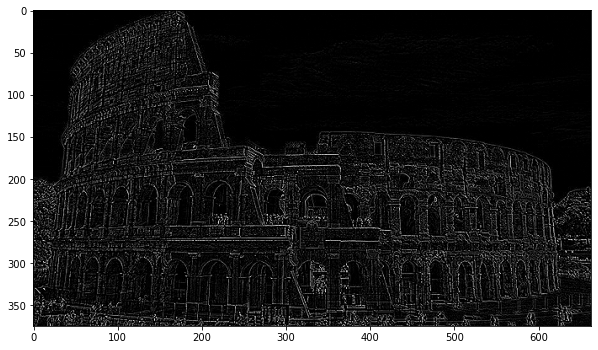

In [ ]:
# Laplaciano v4
border_det(im)

Seleccione el filtro deseado: 

0 = Laplaciano v4 
1 = Sobel Este 
2 = Sobel Sur                    
3 = Sobel Oeste 
4 = Sobel Norte 

1


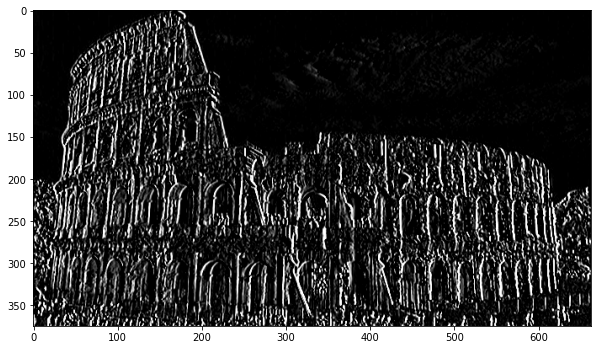

In [ ]:
# Sobel Este
border_det(im)

Seleccione el filtro deseado: 

0 = Laplaciano v4 
1 = Sobel Este 
2 = Sobel Sur                    
3 = Sobel Oeste 
4 = Sobel Norte 

2


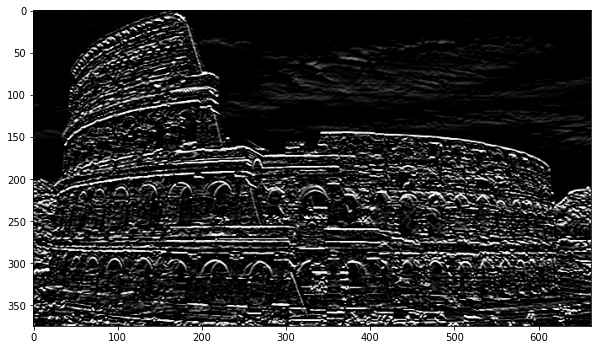

In [ ]:
# Sobel Sur
border_det(im)

Seleccione el filtro deseado: 

0 = Laplaciano v4 
1 = Sobel Este 
2 = Sobel Sur                    
3 = Sobel Oeste 
4 = Sobel Norte 

3


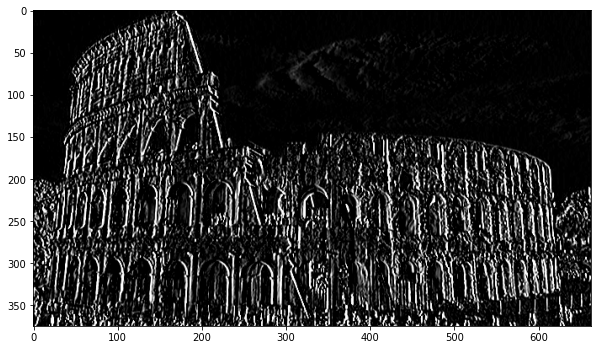

In [ ]:
# Sobel Oeste
border_det(im)

Seleccione el filtro deseado: 

0 = Laplaciano v4 
1 = Sobel Este 
2 = Sobel Sur                    
3 = Sobel Oeste 
4 = Sobel Norte 

4


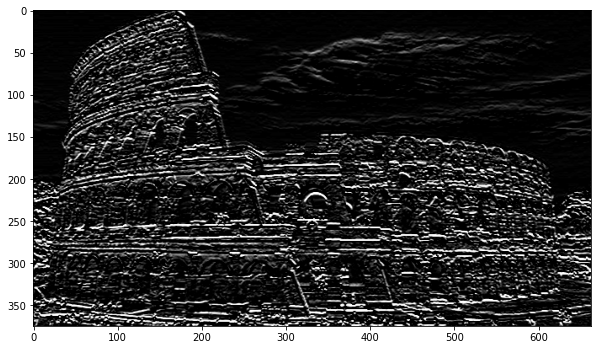

In [ ]:
# Sobel Norte
border_det(im)

### Pasabanda - Diferencia de gaussianas

In [ ]:
def pasabanda(image, ret = False):
  bartlett3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
  gauss5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]) / 256
  image = rgb_to_yiq(image)
  yiq_image2 = yiq_image3 = image
  #filter =  input('Seleccione el filtro deseado: \n\n0 = Pasabajos plano  \n1 = Bartlett 3x3 \n2 = Gaussiano 5x5\n\n', )
  num_rows, num_cols = image.shape[0], image.shape[1]
  image_resized3x3 = size_transform3x3(image)
  for row in range(num_rows):
      for col in range(num_cols):
        Yp_3x3 = np.sum(np.multiply(image_resized3x3[row:(row+3), col:(col+3), 0], bartlett3x3)) 
        yiq_image2[row][col][0] = Yp_3x3      
        yiq_image2[row][col][1] = 0
        yiq_image2[row][col][2] = 0
  im_3x3 = yiq_to_rgb(yiq_image2)
  image_resized5x5 = size_transform5x5(image)
  for row in range(num_rows):
      for col in range(num_cols):
        Yp_5x5 = np.sum(np.multiply(image_resized5x5[row:(row+5), col:(col+5), 0], gauss5x5))                        
        yiq_image3[row][col][0] = Yp_5x5     
        yiq_image3[row][col][1] = 0
        yiq_image3[row][col][2] = 0
  im_5x5 = yiq_to_rgb(yiq_image3)
  im_out = im_3x3 - im_5x5
  if ret == False: 
    figure(figsize=(10, 10))
    plt.imshow(im_3x3)
  else:
    return im_3x3

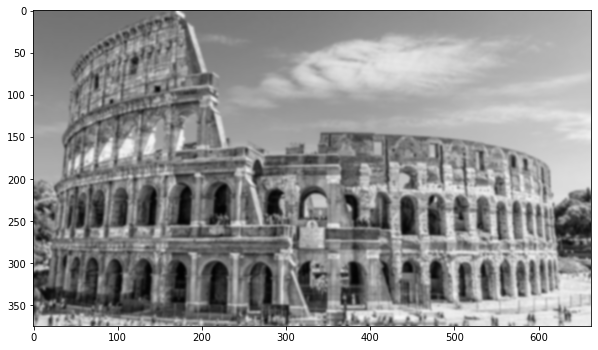

In [ ]:
pasabanda(im)

## Ejercicio 2.2


### Definición de funciones a utilizar

In [ ]:
# Aplica los filtros de erosión, dilatación, mediana o borde morfológico
def morfo(image, ret = False, ask = True, filter = "e"):
  if ask == True:
    filter =  input('Seleccione la operación deseada: \n\ne = Erosión \nd = Dilatación \
                     \nm = Mediana\nb = Borde morfológico\n\n', )
  image = rgb_to_yiq(image)
  yiq_image2 = image.copy()
  num_rows, num_cols = image.shape[0], image.shape[1]
  for row in range(num_rows):
      for col in range(num_cols):
        coords = get_coords(row, col, image)
        pix = image[coords[0]:coords[1], coords[2]:coords[3], 0]
        if filter == "e": Yp = np.min(pix)
        elif (filter == "d") | (filter == "b"): Yp = np.max(pix)
        elif filter == "m": Yp = np.median(pix)
        elif filter == "f": Yp = image[row][col][0]
        else: print("Elija un filtro entre los permitidos"); return
        yiq_image2[row][col][0] = Yp      
        yiq_image2[row][col][1] = 0
        yiq_image2[row][col][2] = 0
        if filter == "b": yiq_image2[row][col] = yiq_image2[row][col] - image[row][col]
  yiq_image2 = yiq_to_rgb(yiq_image2)
  if ret == False: 
    #figure(figsize=(20, 10))
    plt.imshow(yiq_image2)
  else:
    return yiq_image2

In [ ]:
# Aplica filtros sucesivos (erosión, dilatación, mediana), según requerimiento
def morfo_seq(image):
  imp_tmp = image.copy()
  op = "e"
  total_ops = ""
  a = 0
  while op != "f":
    op =  input('\nSeleccione la operación deseada: \n\ne = Erosión \nd = Dilatación \
                 \nm = Mediana\nf = Finalizar operación\n\n', )
    if op != "f": total_ops = total_ops + op
    imp_tmp = morfo(imp_tmp, ret = True, ask = False, filter = op)
  print("\nProcesamientos realizados: " + total_ops)
  plt.imshow(imp_tmp)

In [ ]:
# Aplica el filtro Top Hat. Para ello, primero se erosiona la imágen, luego se la dilata
# y finalmente a la imágen original se resta la imágen dilata en el paso anterior
# A partir del parámetro cuasi_resta se define si la resta se realiza por clampeado o por promedio
def top_hat_filter(image, ret=False): 
  im_erosionada = morfo(image, ask=False, ret=True)
  im_dilatada   = morfo(im_erosionada, ask=False, filter='d', ret=True)
  yiq_image3  = rgb_to_yiq(image)
  image       = rgb_to_yiq(im_dilatada)
  yiq_image2  = image.copy() 
  num_rows, num_cols = image.shape[0], image.shape[1]
  for row in range(num_rows):
    for col in range(num_cols):
      coords = get_coords(row, col, image)
      pix = image[coords[0]:coords[1], coords[2]:coords[3], 0]
      Yp = yiq_image3[row][col][0] - yiq_image2[row][col][0]
      if Yp < 0: Yp = 0
      yiq_image2[row][col][0] = Yp 
  yiq_image2 = yiq_to_rgb(yiq_image2)  
  if ret == False: 
    plt.imshow(yiq_image2)
  else:
    return yiq_image2      

### Carga de imágen

In [ ]:
uploaded = files.upload()
im = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im

### Aplicación de filtros

#### Erosión

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                      
m = Mediana

e


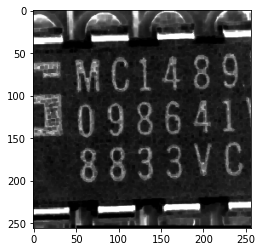

In [ ]:
morfo(im)

#### Dilatación

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                      
m = Mediana

d


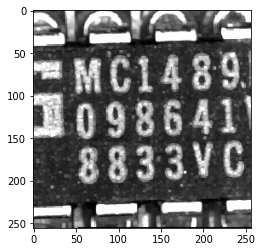

In [ ]:
morfo(im)

#### Mediana

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                      
m = Mediana

m


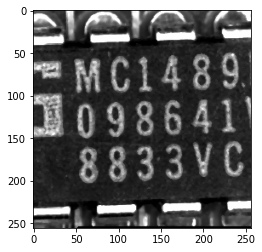

In [ ]:
morfo(im)

#### Morfológico

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                      
m = Mediana
b = Borde morfológico

b


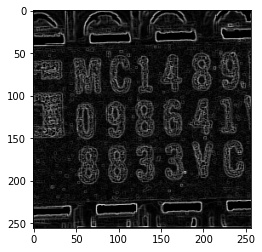

In [ ]:
morfo(im)

#### Apertura


Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

e

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

d

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

f

Procesamientos realizados: ed


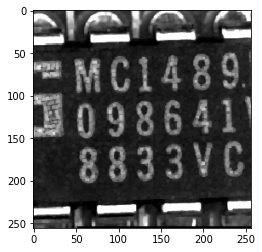

In [ ]:
morfo_seq(im)

#### Cierre


Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

d

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

e

Seleccione la operación deseada: 

e = Erosión 
d = Dilatación                  
m = Mediana
f = Finalizar operación

f

Procesamientos realizados: de


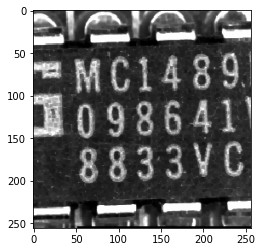

In [ ]:
morfo_seq(im)

#### Top Hat

Saving top_hat_orig.jpg to top_hat_orig (1).jpg


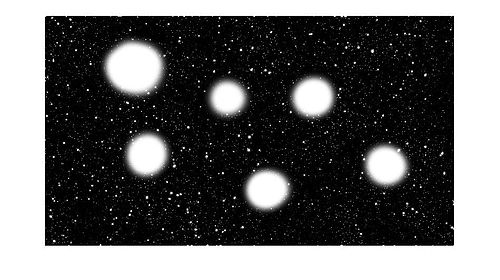

In [ ]:
uploaded = files.upload()
im = Image.open([i for i in uploaded.keys()][0]).convert('RGB')
im

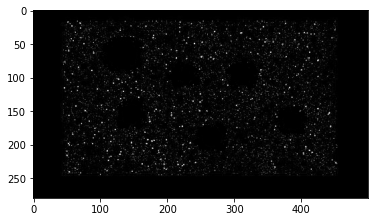

In [ ]:
top_hat_filter(im)